In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [2]:
col=("age sex tb db alkphos sgpt sgot tp alb a/gratio selector").split()
df= pd.read_csv("ILDP.csv",names=col)
df.info()
print(df["sex"].value_counts())
df["sex"]=(df["sex"]!="Male").astype(int)
df["sex"].value_counts()
df=df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       583 non-null    int64  
 1   sex       583 non-null    object 
 2   tb        583 non-null    float64
 3   db        583 non-null    float64
 4   alkphos   583 non-null    int64  
 5   sgpt      583 non-null    int64  
 6   sgot      583 non-null    int64  
 7   tp        583 non-null    float64
 8   alb       583 non-null    float64
 9   a/gratio  579 non-null    float64
 10  selector  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
Male      441
Female    142
Name: sex, dtype: int64


In [3]:
df["a/gratio"].describe()

count    579.000000
mean       0.947064
std        0.319592
min        0.300000
25%        0.700000
50%        0.930000
75%        1.100000
max        2.800000
Name: a/gratio, dtype: float64

In [4]:
df.head()

,age,sex,tb,db,alkphos,sgpt,sgot,tp,alb,a/gratio,selector
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df["selector"]=(df["selector"]==1).astype(int)

In [6]:
# for i in df:
#     for j in df:
#        plt.barh(data=df,y=j,width=4)
#        #print(i,j)

<AxesSubplot: >

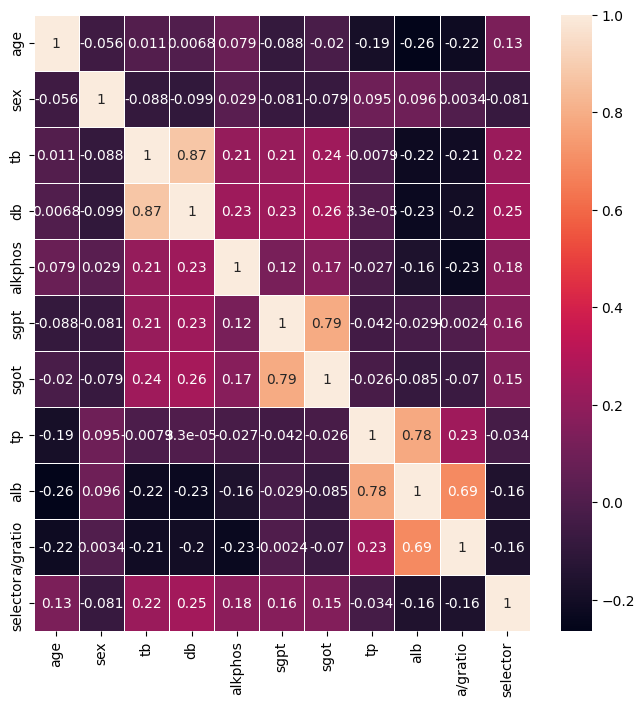

In [44]:
fig , ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),linewidths=0.5,annot=True)

<AxesSubplot: >

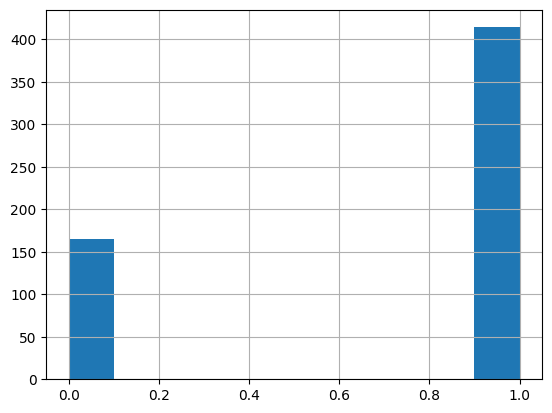

In [28]:
df["selector"].hist()

In [7]:
train,test = np.split(df.sample(frac=1), [int(0.85*len(df))])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 201 to 79
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       492 non-null    int64  
 1   sex       492 non-null    int32  
 2   tb        492 non-null    float64
 3   db        492 non-null    float64
 4   alkphos   492 non-null    int64  
 5   sgpt      492 non-null    int64  
 6   sgot      492 non-null    int64  
 7   tp        492 non-null    float64
 8   alb       492 non-null    float64
 9   a/gratio  492 non-null    float64
 10  selector  492 non-null    int32  
dtypes: float64(5), int32(2), int64(4)
memory usage: 42.3 KB


In [8]:
#x_train , y_train = train.iloc[:,:-1],train.loc[:,"selector"]
#x_test , y_test = test.iloc[:,:-1],train.loc[:,"selector"]
#x_train.head()
#x_train.info()

In [9]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [10]:
train , x_train , y_train = scale_dataset(train,oversample=True)
test , x_test , y_test = scale_dataset(test,oversample=True)

<h2> KNN </h2>

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
knn_model = KNeighborsClassifier(n_neighbors = 11)

knn_model = knn_model.fit(x_train,y_train)

KNeighborsClassifier()

y_pred = knn_model.predict(x_test)

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.64      0.61        56
           1       0.59      0.52      0.55        56

    accuracy                           0.58       112
   macro avg       0.58      0.58      0.58       112
weighted avg       0.58      0.58      0.58       112



<h2>Naive Bayes</h2>

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [16]:
y_pred = nb_model.predict(x_test)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.88      0.72        56
           1       0.78      0.45      0.57        56

    accuracy                           0.66       112
   macro avg       0.70      0.66      0.64       112
weighted avg       0.70      0.66      0.64       112



<h2>Logistic Regression</h2>

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [20]:
y_pred = lg_model.predict(x_test)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        56
           1       0.70      0.57      0.63        56

    accuracy                           0.66       112
   macro avg       0.67      0.66      0.66       112
weighted avg       0.67      0.66      0.66       112



<h2>SVM</h2>

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [24]:
y_pred = svm_model.predict(x_test)

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70        67
           1       0.57      0.71      0.63        45

    accuracy                           0.67       112
   macro avg       0.67      0.68      0.67       112
weighted avg       0.69      0.67      0.67       112

